In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import random
import os
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import tensorflow_datasets as tfds


from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is', device)

Current cuda device is cpu


In [3]:
batch_size = 5
epoch_num = 10
learning_rate  = 0.0001

In [23]:
# trans = transforms.Compose([transforms.Resize((100,100)), 
#                             transforms.ToTensor(),
#                            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
# pre_data=torchvision.datasets.ImageFolder(root = 'data', transform = trans)
# print(pre_data.__getitem__(10))

train_data =os.listdir('data/train')
test_data =os.listdir('data/test')
# base_dir = 'data'
# img_dir ='data/train'
#test_dir = os.listdir(img_dir)

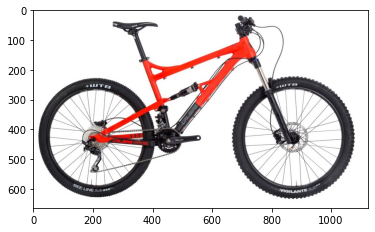

In [24]:
sample = random.choice(train_data)
image = keras.utils.load_img("data/train/"+sample)
plt.imshow(image)

In [26]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle=True)

first_batch = train_loader.__iter__().__next__()
# print('{:15s}|{:<25s}|{}'.format('name','type','size'))
# print('{:15s}|{:<25s}|{}'.format('Num of Batch','',len(train_loader)))
# print('{:15s}|{:<25s}|{}'.format('first_batch',str(type(first_batch)),len(first_batch)))
# print('{:15s}|{:<25s}|{}'.format('first_batch[0]',str(type(first_batch[0])),first_batch[0].shape))
# print('{:15s}|{:<25s}|{}'.format('first_batch[1]',str(type(first_batch[1])),first_batch[1].shape))

In [27]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1)
        self.conv2 = nn.Conv2d(32,64,3,1)
        self.dropout1= nn.Dropout2d(0.25)
        self.dropout2= nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216,128)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self, x):
        x- self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.dropout1(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x,dim=1)
        return output

In [28]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [29]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [30]:
model.train()
i = 0
for epoch in range(epoch_num):
    for data, target in train_loader:
        data =data.to(device)
        target =  target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        if i %1000 ==0:
            print('train step:{}\tLoss:{:.3f}'.format(i,loss.item()))
        i+=1

ValueError: too many values to unpack (expected 2)